In [298]:
import pandas as pd
import numpy as np

#Visualization package
import matplotlib.pylab as plt
import seaborn as sns

#Combination
from itertools import cycle #Infinite iterator

#Other setting
pd.set_option('max_columns', 50)
plt.style.use('bmh')
import gc; gc.enable()
import warnings #Turn off warning
warnings.filterwarnings("ignore")

#Import category10 color palette
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [19]:
ls ../Data

calendar.csv                sample_submission.csv
sales_train_validation.csv  sell_prices.csv


In [20]:
# Read in the data
INPUT_DIR = '../Data'
cal = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
stv = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')
ss = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')
sellp = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')

In [90]:
# Sales Heatmap Calendar
# ----------------------------------------------------------------------------
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from datetime import datetime
from dateutil.relativedelta import relativedelta


def calmap(ax, year, data):
    ax.tick_params('x', length=0, labelsize="medium", which='major')
    ax.tick_params('y', length=0, labelsize="x-small", which='major')

    # Month borders
    xticks, labels = [], []
    start = datetime(year,1,1).weekday()
    for month in range(1,13):
        first = datetime(year, month, 1)
        last = first + relativedelta(months=1, days=-1)

        y0 = first.weekday()
        y1 = last.weekday()
        x0 = (int(first.strftime("%j"))+start-1)//7
        x1 = (int(last.strftime("%j"))+start-1)//7

        P = [ (x0,   y0), (x0,    7),  (x1,   7),
              (x1,   y1+1), (x1+1,  y1+1), (x1+1, 0),
              (x0+1,  0), (x0+1,  y0) ]
        xticks.append(x0 +(x1-x0+1)/2)
        labels.append(first.strftime("%b"))
        poly = Polygon(P, edgecolor="black", facecolor="None",
                       linewidth=1, zorder=20, clip_on=False)
        ax.add_artist(poly)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(labels)
    ax.set_yticks(0.5 + np.arange(7))
    ax.set_yticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
    ax.set_title("{}".format(year), weight="semibold")
    
    # Clearing first and last day from the data
    valid = datetime(year, 1, 1).weekday()
    data[:valid,0] = np.nan
    valid = datetime(year, 12, 31).weekday()
    # data[:,x1+1:] = np.nan
    data[valid+1:,x1] = np.nan

    # Showing data
    ax.imshow(data, extent=[0,53,0,7], zorder=10, vmin=-1, vmax=1,
              cmap="RdYlBu_r", origin="lower", alpha=.75)

# I. Single Item 

## 1) Sale quantity by day, month, year

In [205]:
stv.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1


In [352]:
stv.sample()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
25365,HOUSEHOLD_1_418_WI_2_validation,HOUSEHOLD_1_418,HOUSEHOLD_1,HOUSEHOLD,WI_2,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,53,48,15,12,13,10,12,9,39,29,16,18,17,14,22,17,23,6,6,14,7,39,23,17


In [368]:
stv[stv.id=='FOODS_3_090_CA_3_validation']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,...,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
8412,FOODS_3_090_CA_3_validation,FOODS_3_090,FOODS_3,FOODS,CA_3,CA,108,132,102,120,106,123,279,175,186,120,0,0,0,0,0,0,0,0,0,...,130,156,133,114,80,75,113,81,107,160,124,107,84,88,90,129,160,204,86,100,88,77,141,139,130


In [369]:
# Merge calendar on our items' data
example = stv.loc[stv['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T 
example = example.rename(columns={8412:'FOODS_3_090_CA_3_validation'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(cal, how='left', validate='1:1')

In [370]:
example.head(5)

,d,FOODS_3_090_CA_3_validation,date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,d_1,108,2011-01-29,11101,Saturday,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
1,d_2,132,2011-01-30,11101,Sunday,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2,d_3,102,2011-01-31,11101,Monday,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
3,d_4,120,2011-02-01,11101,Tuesday,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
4,d_5,106,2011-02-02,11101,Wednesday,5,2,2011,NaN,NaN,NaN,NaN,1,0,1


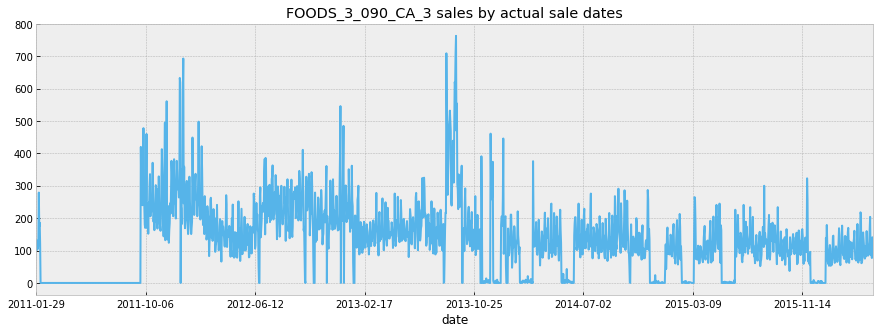

In [373]:
example.set_index('date')['FOODS_3_090_CA_3_validation'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

## 2) Trends for Item Time

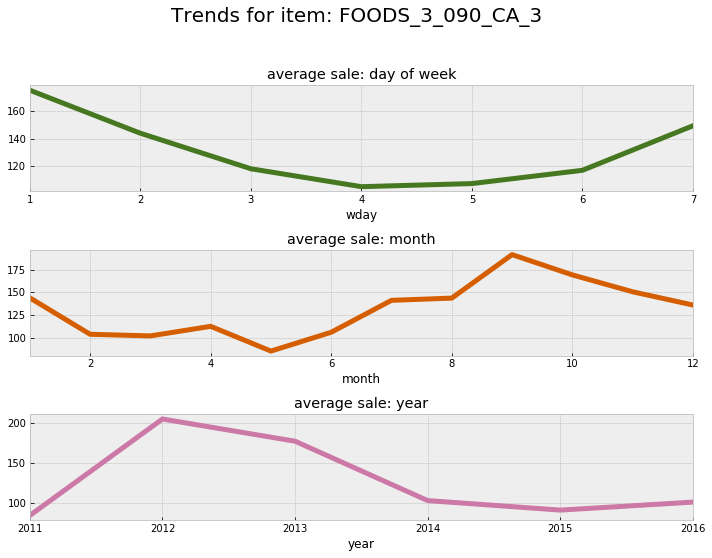

In [178]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 7))

example.groupby('wday').mean()['FOODS_3_090_CA_3'] \
    .plot(kind='line',
          title='average sale: day of week',
          lw=5,
          color=next(
              color_cycle),
          ax=ax1)

example.groupby('month').mean()['FOODS_3_090_CA_3'] \
    .plot(kind='line',
          title='average sale: month',
          lw=5,
          color=next(
               color_cycle),

          ax=ax2)
example.groupby('year').mean()['FOODS_3_090_CA_3'] \
    .plot(kind='line',
          lw=5,
          title='average sale: year',
          color=next(
              color_cycle),

          ax=ax3)

fig.suptitle('Trends for item: FOODS_3_090_CA_3',
             size=20,
             y=1.1)

#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout()
plt.show()

## 3) Sale price in stores in Texas and Cali by week

We are given historical sale prices of each item. Lets take a look at our example item from before.
- It looks to me like the price of this item is growing.
- Different stores have different selling prices.

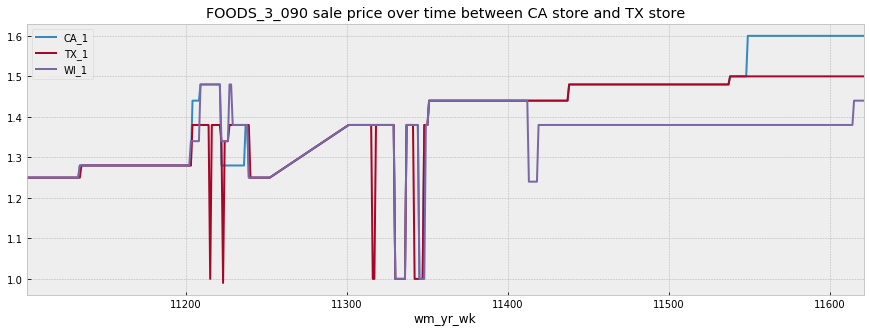

In [183]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []

for store, d in sellp[(sellp.item_id == "FOODS_3_090")&((sellp.store_id=="CA_1")|
                                                        (sellp.store_id=="TX_1")|
                                                       (sellp.store_id=="WI_1"))].groupby('store_id'):
    d.plot(x='wm_yr_wk',
          y='sell_price',
          color=next(color_cycle),
          figsize=(15, 5),
          title='FOODS_3_090 sale price over time between CA store and TX store',
         ax=ax,
          legend=store)
    stores.append(store)
    plt.legend()
plt.legend(stores)
plt.show()

# II. Overview

## 4) Volumne sale by category type (stack by state)

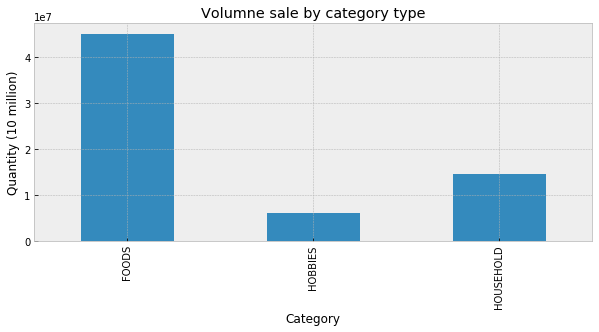

In [229]:
volumne_by_category=stv.groupby('cat_id').sum().sum(axis=1)
volumne_by_category.plot(kind='bar',figsize=(10,4))
plt.title("Volumne sale by category type")
plt.ylabel("Quantity (10 million)")
plt.xlabel("Category")
plt.show()

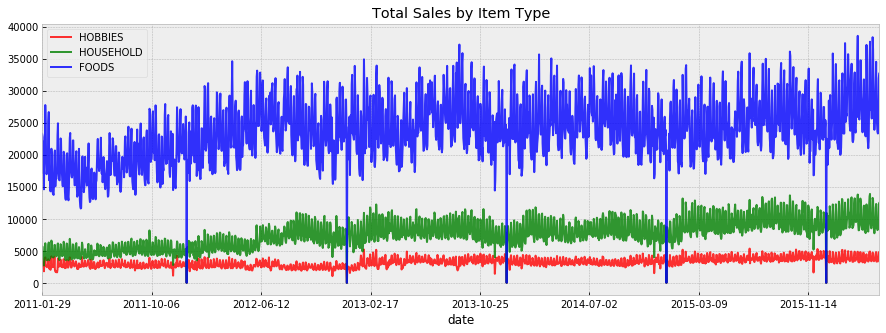

In [387]:
color_list=cycle(['red','green', 'blue'])
past_sales = stv.set_index('id')[d_cols] \
    .T \
    .merge(cal.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type',color=next(color_list))
plt.legend(stv['cat_id'].unique())
plt.show()

## 5) Price distribution for each category

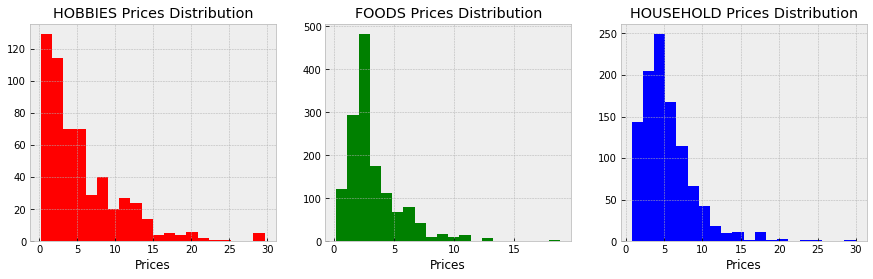

In [388]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for index,cat in enumerate(['HOBBIES','FOODS','HOUSEHOLD']):
    ax=sellp[sellp.Category==cat].groupby('item_id')['sell_price'].mean().hist(bins=20, 
                                                                                 ax=axs[index],
                                                                                 color=next(color_list)
                                                                              )
    axs[index].set_title(cat + " Prices Distribution")
    axs[index].set_xlabel("Prices")

## 6) Volumn sale by state stores (stack bar)

In [257]:
volumne_by_state=stv.groupby(['state_id','store_id']).sum().sum(axis=1)
mean_=volumne_by_state.reset_index().groupby('state_id').mean()/1000000
std_=volumne_by_state.reset_index().groupby('state_id').std()/1000000

In [255]:
mean_[0]

state_id
CA    7.168887
TX    6.299669
WI    6.040285
Name: 0, dtype: float64

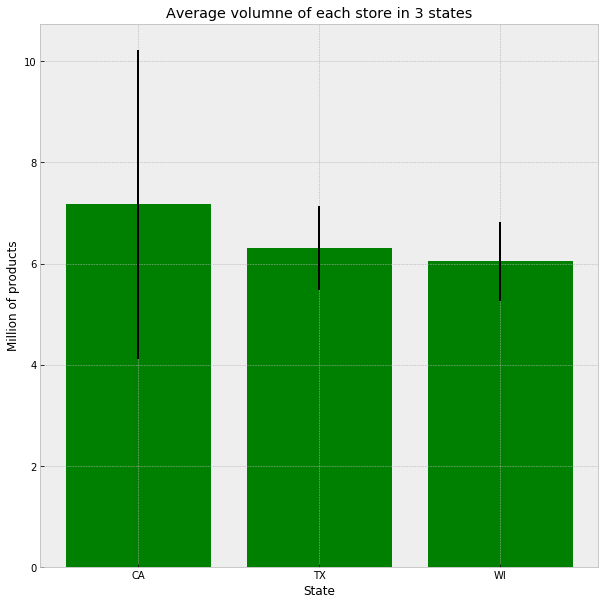

In [267]:
plt.figure(figsize=(10,10))
plt.bar(mean_.index, mean_[0].values, yerr=std_[0].values, color='green')
plt.xlabel("State")
plt.ylabel("Million of products")
plt.title("Average volumne of each store in 3 states")
plt.show()

## 7) Rolling 30 Day average sale each store

Looking at the same data a different way, we can plot a rolling 7 day total demand count by store. Note clearly that some stores have abrupt changes in their demand, it could be that the store expanded or a new competitor was built near by. Either way this is imporant to note when creating predictive models about demand pattern. 

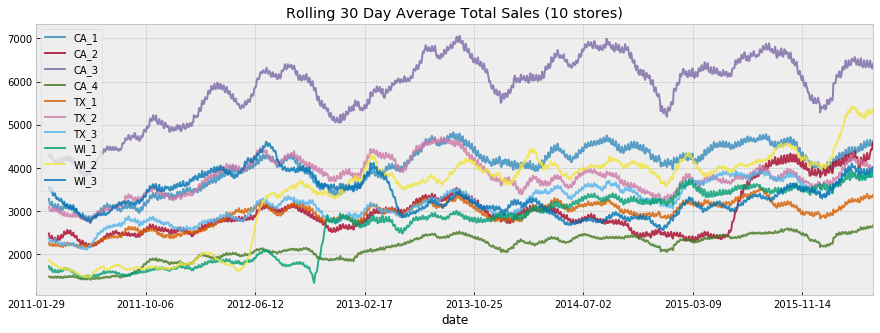

In [374]:
store_list = sellp['store_id'].unique()
for s in store_list:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Rolling 30 Day Average Total Sales (10 stores)')
plt.legend(store_list)
plt.show()

In [376]:
'CA'in 'CA_1'

True

In [375]:
store_list

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

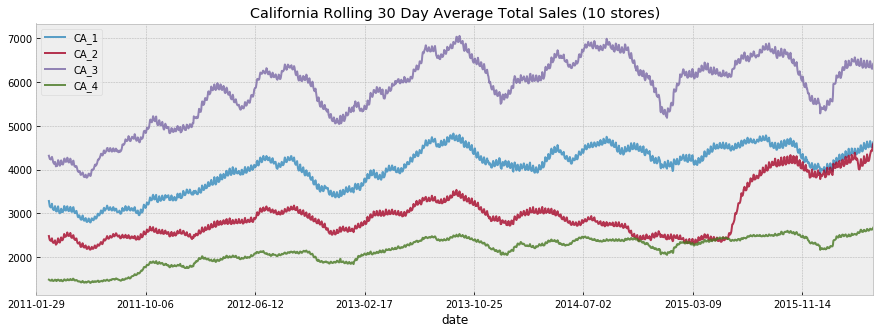

In [382]:
#CA
state_store =[i for i in sellp['store_id'].unique() if 'CA' in i]
for s in state_store:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='California Rolling 30 Day Average Total Sales (10 stores)')
plt.legend(state_store)
plt.show()

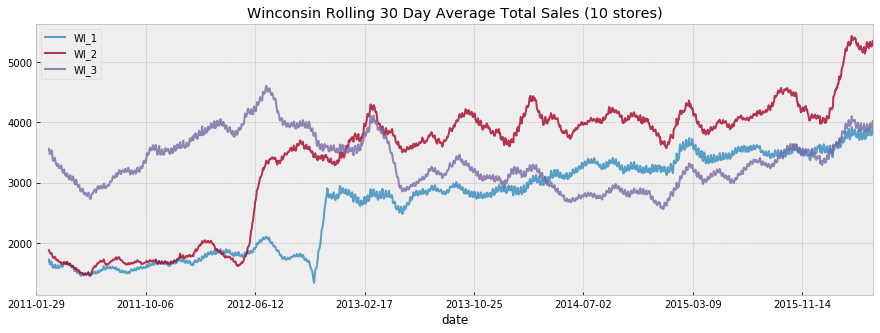

In [381]:
#TX
state_store =[i for i in sellp['store_id'].unique() if 'WI' in i]
for s in state_store:
    store_items = [c for c in past_sales.columns if s in c]
    past_sales[store_items] \
        .sum(axis=1) \
        .rolling(30).mean() \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Winconsin Rolling 30 Day Average Total Sales (10 stores)')
plt.legend(state_store)
plt.show()

## 9) Top 5 item revenue

In [271]:
sellp.head()

,store_id,item_id,wm_yr_wk,sell_price,Category
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES


In [274]:
price_average_df=sellp.groupby('item_id')['sell_price'].mean()
average_price=stv.item_id.map(price_average_df)

In [330]:
total=((stv[d_cols].sum(axis=1)) * average_price).astype(int)

df_temp=stv[['item_id','store_id','state_id']]
df_temp['Quantity']=np.round(stv[d_cols].values.sum(axis=1)/1000000,2)
df_temp['Revenue']=np.round(total/1000000,2)
df_temp=df_temp.groupby('item_id').sum()
df_temp=df_temp.reset_index()
#Top 5
df_temp=df_temp.sort_values(by='Revenue',ascending=False).head(5)

In [343]:
[1]*2

[1, 1]

In [329]:
df_temp.head()

,item_id,Quantity,Revenue
1198,FOODS_3_586,920242,1468.7
732,FOODS_3_120,283104,1409.2
702,FOODS_3_090,1002529,1368.0
814,FOODS_3_202,295689,1259.9
1199,FOODS_3_587,396119,996.4


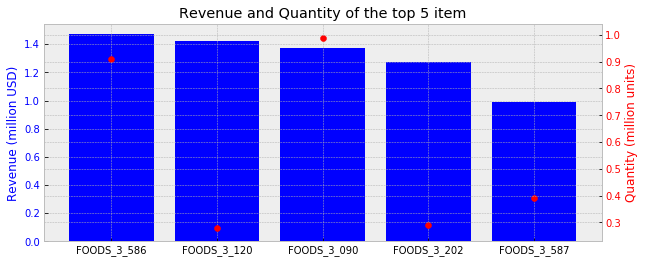

In [338]:
fig, ax1 = plt.subplots(figsize=(10,4))
color=['blue','red']

ax1.bar(df_temp.item_id, df_temp.Revenue,color=color[0])
ax1.set_ylabel('Revenue (million USD)', color=color[0])
ax1.tick_params(axis='y', labelcolor=color[0])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.scatter(df_temp.item_id, df_temp.Quantity,color=color[1])

ax2.set_ylabel('Quantity (million units)', color=color[1])
ax2.tick_params(axis='y', labelcolor=color[1])

plt.title("Revenue and Quantity of the top 5 item")
plt.show()

# III. Trend

Some interesting things to note from these heatmaps:
- Food tends to have lower number of purchases as the month goes on. Could this be because people get their paychecks early in the month?
- Household and Hobby items sell much less in January - after the Holiday season is over.
- Cleary weekends are more popular shopping days regardless of the item category.

## 10) Heatmap

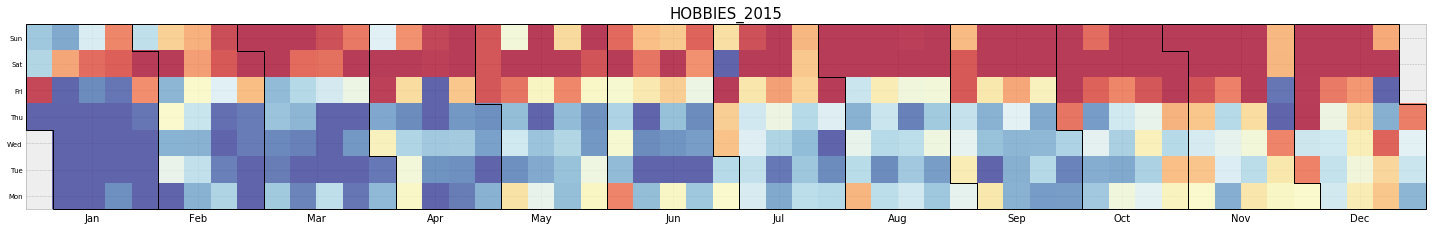

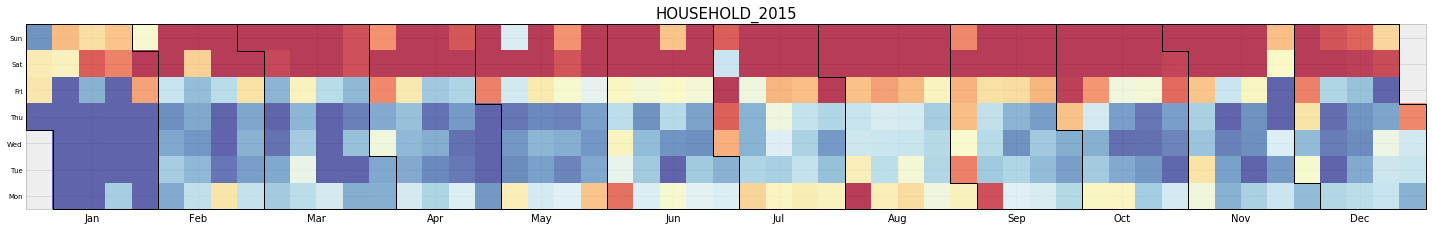

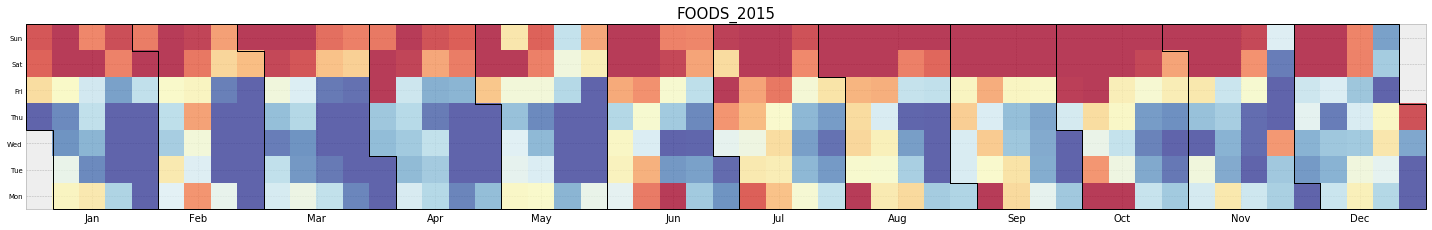

In [339]:
from sklearn.preprocessing import StandardScaler
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
year='2015'
for i in stv['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    fig, axes = plt.subplots(1, 1, figsize=(20, 8))
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                             periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1))) #normalize: (x-mu)/std
    calmap(axes, int(year), vals.reshape(53,7).T)
    plt.title(i +"_"+ year, fontsize=15)
    plt.tight_layout()
    plt.show()